# Data Science Project
## Analysis of the Young People Survey

Youth! Such a wonderful thing! 

# Data preparation
In order to start working with dataset, it's important to get first impression and understand the insights. Very first thing is importing needed libraries and loading dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I've chosen "Young People Survey" dataset from Kaggle, as it has plenty of available questions and answers giving me chance to find interesting relations between data. There are both numerical and categorical variables.
Dataset has 1010 rows and 150 columns saved in "responses.csv" file.

In [2]:
# data
df = pd.read_csv('./dataSet/responses.csv')
print("Size of the dataset:",df.shape)
df.head()

Size of the dataset: (1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
# to get first impression of the insides
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


Columns represent question, so it's difficult to keep their names short. In order to understand column name, there is additional file given, called "columns.csv". It is usefull while analysing main dataset.

In [32]:
# to understand columns names
# see description.txt for details
df_columns = pd.read_csv('./dataSet/columns.csv')
df_columns.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


Before starting, let's check how many empty cells

In [5]:
for col in df.columns:
    if(np.sum(df[col].isnull()) != 0):
        print("Number of empty cells: ", np.sum(df[col].isnull()), ", column name: ", col)

Number of empty cells:  3 , column name:  Music
Number of empty cells:  2 , column name:  Slow songs or fast songs
Number of empty cells:  4 , column name:  Dance
Number of empty cells:  5 , column name:  Folk
Number of empty cells:  5 , column name:  Country
Number of empty cells:  7 , column name:  Classical music
Number of empty cells:  2 , column name:  Musical
Number of empty cells:  3 , column name:  Pop
Number of empty cells:  6 , column name:  Rock
Number of empty cells:  3 , column name:  Metal or Hardrock
Number of empty cells:  8 , column name:  Punk
Number of empty cells:  4 , column name:  Hiphop, Rap
Number of empty cells:  7 , column name:  Reggae, Ska
Number of empty cells:  6 , column name:  Swing, Jazz
Number of empty cells:  7 , column name:  Rock n roll
Number of empty cells:  7 , column name:  Alternative
Number of empty cells:  8 , column name:  Latino
Number of empty cells:  7 , column name:  Techno, Trance
Number of empty cells:  1 , column name:  Opera
Number o

# Hypothesis testing

As many of you, I love watching movies. I'm pretty sure everyone has some preferences. I would choose thriller or comedy movie as my favourites. I am quite curious are there any patterns among young people when it comes to movie preferences. So, I asked two questions: 

### Do women have different movie preferences then men?
and
### Do people have different interests (prefer romantic movies over action movies)?

I took a closer look at gender and movie categories.
"Young People Survey" has many columns, so first challenge is to find relevant once.

In [6]:
# gender information: 
gender_df = df["Gender"]
# find 'movies' columns:
print(list(df.columns))

['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Smoking', 'Alcohol',

In [7]:
# get relevant column names: 
# 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 
# 'Animated', 'Documentary', 'Western', 'Action'

# get indexes of the listed columns: 
movies_first_idx = df.columns.get_loc("Movies")
movies_df = df.iloc[:, movies_first_idx : (movies_first_idx+12)]
print(list(movies_df.columns))

# merge gender and movies into one dataFrame
movies_vs_gender_df = pd.concat([gender_df,movies_df], axis = 1)
movies_vs_gender_df.head()

['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action']


,Gender,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,female,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,female,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,female,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,female,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,female,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0


As already seen before, there are some empty cells in the data set. Let's list the once again. Maximal number of empty cells for the column is 8. There are 1010 participants in total, so even delating all the empty cells in the chosen dataset (sum is 41, which is less than 5% of all the rows) will not harm the output.

In [8]:
for col in movies_vs_gender_df.columns:
    if(np.sum(df[col].isnull()) != 0):
        print("Number of empty cells: ", np.sum(df[col].isnull()), ", column name: ", col)
        
# get rid of empty cells:
movies_vs_gender_df[movies_vs_gender_df.columns].replace('', np.nan)
movies_vs_gender_df = movies_vs_gender_df.dropna(subset=movies_vs_gender_df.columns,how='any')
print("Dataset without empty cell has size of:", movies_vs_gender_df.shape)

# number of removed rows:
removed_rows_num = df.shape[0] - movies_vs_gender_df.shape[0]
print("Number of removed rows:", removed_rows_num)

Number of empty cells:  6 , column name:  Gender
Number of empty cells:  6 , column name:  Movies
Number of empty cells:  2 , column name:  Horror
Number of empty cells:  1 , column name:  Thriller
Number of empty cells:  3 , column name:  Comedy
Number of empty cells:  3 , column name:  Romantic
Number of empty cells:  2 , column name:  Sci-fi
Number of empty cells:  2 , column name:  War
Number of empty cells:  3 , column name:  Fantasy/Fairy tales
Number of empty cells:  3 , column name:  Animated
Number of empty cells:  8 , column name:  Documentary
Number of empty cells:  4 , column name:  Western
Number of empty cells:  2 , column name:  Action
Dataset without empty cell has size of: (969, 13)
Number of removed rows: 41


Now, I'd like to create dataFrame with the avaraged values for each movie category in male and female answers.

In [9]:
# get avaliable gender information by looking for unique categories
gender_types = movies_vs_gender_df["Gender"].unique()
print("Gender:",gender_types)

# create empty dataFrame to store mean values for each movie type and gender
female_vs_men_movies = pd.DataFrame(columns = ['male', 'female'], index=['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action'])

female_responses = movies_vs_gender_df[movies_vs_gender_df["Gender"] == "female"]
male_responses = movies_vs_gender_df[movies_vs_gender_df["Gender"] == "male"]

# calculate mean value for both male and female responses
for col in movies_vs_gender_df.columns:
    if(col != "Gender"):
        mean_value_female = female_responses[col].mean()
        mean_value_male = male_responses[col].mean()
        female_vs_men_movies.loc[col] = pd.Series({'female':mean_value_female, 'male':mean_value_male})
print(female_vs_men_movies)


Gender: ['female' 'male']
                        male   female
Movies               4.58779  4.62326
Horror               3.06107  2.59549
Thriller             3.66158  3.18576
Comedy               4.48346  4.51215
Romantic             2.84733  3.93924
Sci-fi               3.61578  2.76736
War                  3.82443   2.6875
Fantasy/Fairy tales  3.34097  4.03472
Animated             3.50382  3.96875
Documentary          3.80916  3.53125
Western              2.62087  1.78993
Action               4.14249   3.1059


<AxesSubplot:>

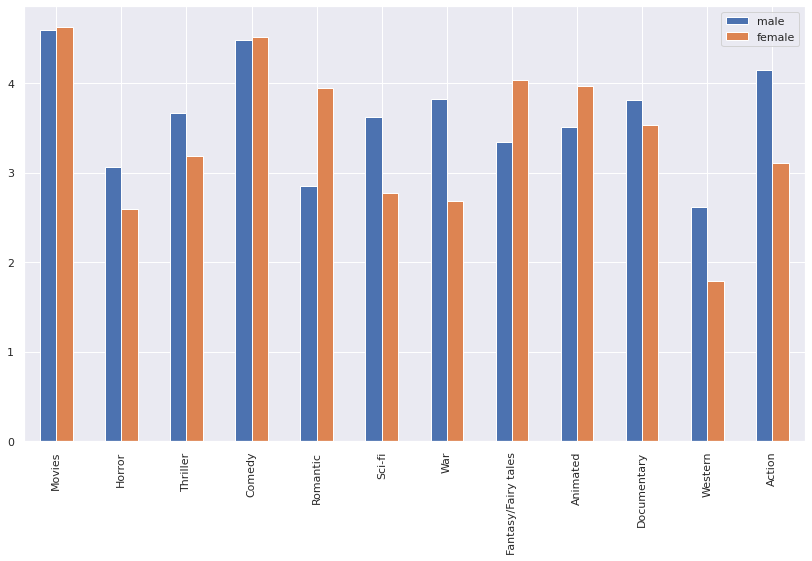

In [10]:
# visualize the output
sns.set(rc={'figure.figsize':(14,8)})
female_vs_men_movies.plot.bar()

Figure shows us not only differences between male and female movie preferences, but also how much people like or dislike certain movie types. Scale on the vertical axis shows us the chosen answer (number 5 correspond to "Enjoy very much" and 0 to "Don't enjoy at all"), so we could say that comedies are number one in beloved music, in contrary to western movies which got the last place.


Figure clearly shows one more thing. Although both men and women love wathing movies in general, there are some differences in choices they make. Take a closer look at them.

In [11]:
# check highest differences
differences_df = pd.DataFrame(columns = ['difference'], index=['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action'])

for index, row in female_vs_men_movies.iterrows():
        differences_df.loc[index] = pd.Series({'difference': (row[0] - row[1])})
print(differences_df)  


                    difference
Movies              -0.0354776
Horror                0.465583
Thriller              0.475814
Comedy              -0.0286922
Romantic              -1.09191
Sci-fi                0.848415
War                    1.13693
Fantasy/Fairy tales  -0.693755
Animated             -0.464933
Documentary            0.27791
Western               0.830935
Action                 1.03659


<AxesSubplot:>

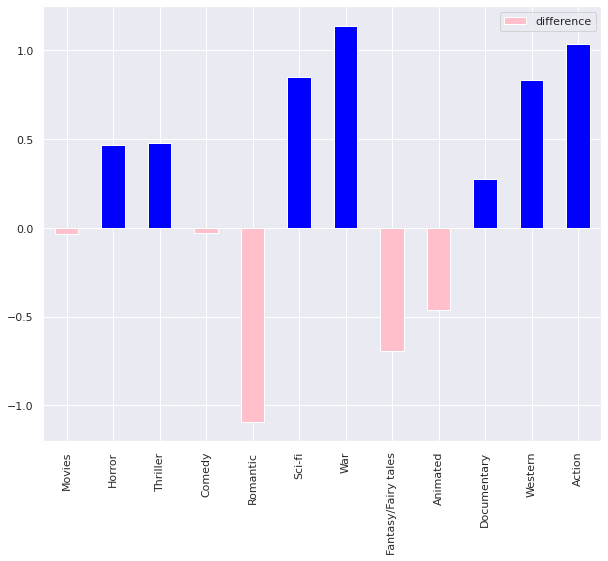

In [12]:
# visualize differences
sns.set(rc={'figure.figsize':(10,8)})
differences_df.plot(kind='bar', color = [np.where(differences_df.difference > 0, 'blue', 'pink')])

War, action and western are definately men area, whether romance, fairy tales and animation - women. Mhmm, who could expect that? Data shows what everyone could believe. But anyway, nice to see it so clearly.
Interesting fact is, that actually only comedy movies are equaly loved by each gender.

## QUESTION 2 
## correlation analysis

### Are there any connections between:
### --> demographic data and spending habits 
### or
### --> between phobias and health habits ?

=============================================================

Find interesting correletion between two data subsets:
(One side: DEMOGRAPHICS)
(Another side: SPENDING HABITS) 
create two subsets for correlation analysis:

In [13]:
# first, chose relevant columns
demographic_data = df.iloc[:,[140, 144, 146, 147, 148, 149]]
demographic_data.head()

,Age,Gender,Education,Only child,Village - town,House - block of flats
0,20.0,female,college/bachelor degree,no,village,block of flats
1,19.0,female,college/bachelor degree,no,city,block of flats
2,20.0,female,secondary school,no,city,block of flats
3,22.0,female,college/bachelor degree,yes,city,house/bungalow
4,20.0,female,secondary school,no,village,house/bungalow


In [14]:
# check categorical variables for type of the categories
unique_vals_education = demographic_data["Education"].unique()
print(unique_vals_education)
unique_vals_village = demographic_data["Village - town"].unique()
print(unique_vals_village)
unique_vals_house = demographic_data["House - block of flats"].unique()
print(unique_vals_house)

['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
['village' 'city' nan]
['block of flats' 'house/bungalow' nan]


In [15]:
#get dummies for categorical variables
demographic_data = pd.get_dummies(demographic_data, columns = ["Gender", "Only child", "Village - town", "House - block of flats"])
print("Size: ", demographic_data.shape)
demographic_data.head()

Size:  (1010, 10)


,Age,Education,Gender_female,Gender_male,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,20.0,college/bachelor degree,1,0,1,0,0,1,1,0
1,19.0,college/bachelor degree,1,0,1,0,1,0,1,0
2,20.0,secondary school,1,0,1,0,1,0,1,0
3,22.0,college/bachelor degree,1,0,0,1,1,0,0,1
4,20.0,secondary school,1,0,1,0,0,1,0,1


In [16]:
# second:
spending_habits = df.iloc[:,133:139]
print("Size: ", spending_habits.shape)
spending_habits.head()

Size:  (1010, 6)


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
0,3.0,4.0,5.0,3.0,3.0,1
1,3.0,4.0,1.0,4.0,2.0,5
2,2.0,4.0,1.0,4.0,3.0,4
3,2.0,4.0,3.0,3.0,4.0,4
4,4.0,3.0,4.0,3.0,3.0,2


Marge subsets

In [17]:
#marge both subsets
demographic_spending_df = pd.concat([demographic_data,spending_habits], axis = 1)
# get rid of empty cells:
demographic_spending_df[demographic_spending_df.columns].replace('', np.nan)
demographic_spending_df = demographic_spending_df.dropna(subset=demographic_spending_df.columns,how='any')
print(demographic_spending_df.shape)
demographic_spending_df.head()

(989, 16)


,Age,Education,Gender_female,Gender_male,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
0,20.0,college/bachelor degree,1,0,1,0,0,1,1,0,3.0,4.0,5.0,3.0,3.0,1
1,19.0,college/bachelor degree,1,0,1,0,1,0,1,0,3.0,4.0,1.0,4.0,2.0,5
2,20.0,secondary school,1,0,1,0,1,0,1,0,2.0,4.0,1.0,4.0,3.0,4
3,22.0,college/bachelor degree,1,0,0,1,1,0,0,1,2.0,4.0,3.0,3.0,4.0,4
4,20.0,secondary school,1,0,1,0,0,1,0,1,4.0,3.0,4.0,3.0,3.0,2


Correlation:

In [18]:
corr1 = demographic_spending_df.corr()
corr1.head()

,Age,Gender_female,Gender_male,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets
Age,1.000000,-0.134751,0.128500,0.102473,-0.102256,-0.017798,0.014114,-0.006177,0.008900,0.027970,-0.143529,-0.072750,-0.037570,-0.077272,-0.012058
Gender_female,-0.134751,1.000000,-0.989612,-0.024569,0.022650,0.021719,-0.018359,0.012222,-0.014978,0.062100,0.174296,-0.162354,-0.176020,0.131928,-0.263008
Gender_male,0.128500,-0.989612,1.000000,0.028042,-0.026148,-0.019423,0.015981,-0.012423,0.015099,-0.056644,-0.169658,0.161523,0.171209,-0.132974,0.264127
Only child_no,0.102473,-0.024569,0.028042,1.000000,-0.997338,-0.038913,0.040231,-0.013880,0.013811,-0.031666,-0.075716,-0.051261,0.001413,-0.100614,-0.042569
Only child_yes,-0.102256,0.022650,-0.026148,-0.997338,1.000000,0.037457,-0.038787,0.011967,-0.011914,0.031750,0.076233,0.051430,-0.004918,0.097094,0.042405


<AxesSubplot:>

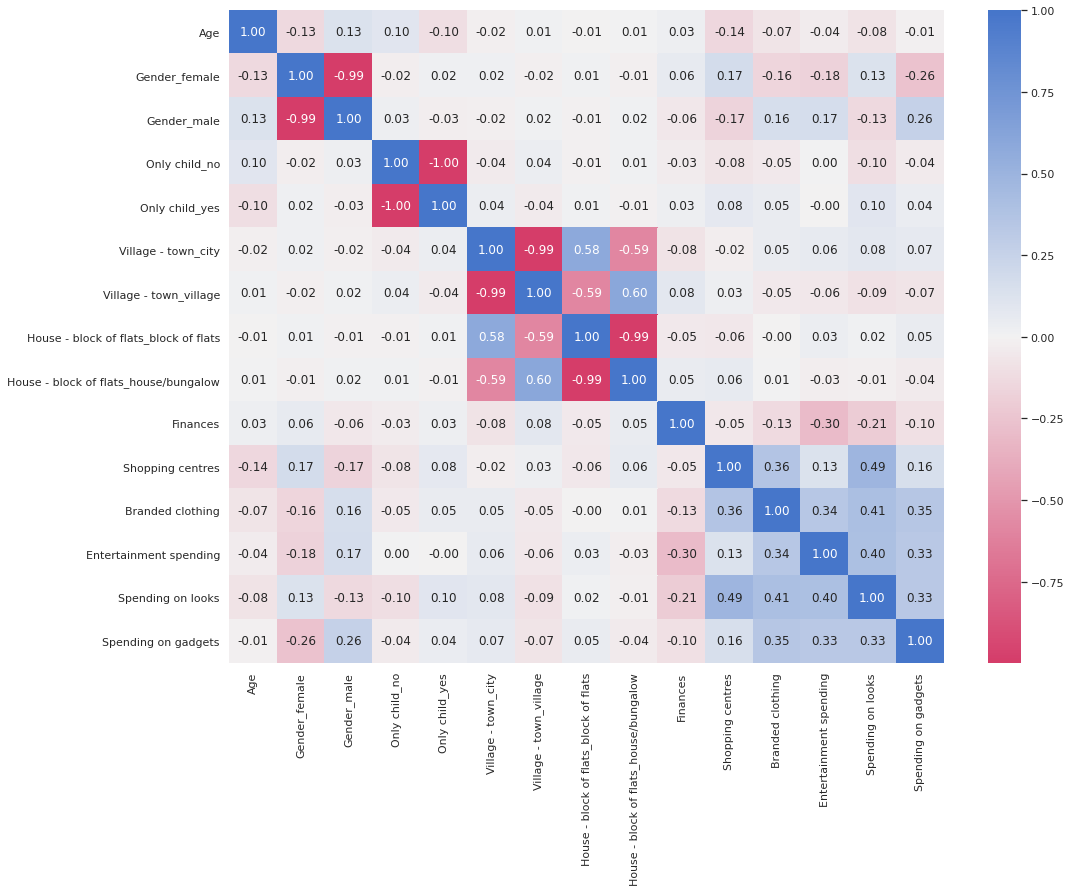

In [19]:
#plot
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(corr1, annot=True, fmt= '.2f', center = 0.00, cmap = sns.diverging_palette(0, 255, as_cmap=True))

Phobias + smoking habits?

=============================================================

Find interesting correletion between two data subsets:

(One side: PHOBIAS)

(Another side: HEALTH HABITS) 

In [20]:
# find index of the column:
# for phobias first column is "Flying" and there are 10 items
# all ten coulmn names: Flying, Thunder lightning, Darkness, Heights, Spiders, Snakes, Rats, Ageing, Dangerous dogs, Public speaking
phobias_first_idx = df.columns.get_loc("Flying")
# get phobias 
phobias_data = df.iloc[:, phobias_first_idx : (phobias_first_idx+10)]
phobias_data.head()

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0
1,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0
2,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0
3,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0
4,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0


In [21]:
# choose only most common once like: darkness, heights, spiders and fear of public speaking
phobias_data = phobias_data.iloc[:,[2,3,4,9]]
phobias_data.head()

,Darkness,Heights,Spiders,Fear of public speaking
0,1.0,1.0,1.0,2.0
1,1.0,2.0,1.0,4.0
2,1.0,1.0,1.0,2.0
3,1.0,3.0,5.0,5.0
4,1.0,1.0,1.0,3.0


In [22]:
# HEALTH HABITS are just after phobias and there are three columns
phobias_last_idx = phobias_first_idx+10
health_data = df.iloc[:, (phobias_last_idx): (phobias_last_idx + 3)]
health_data.head()

,Smoking,Alcohol,Healthy eating
0,never smoked,drink a lot,4.0
1,never smoked,drink a lot,3.0
2,tried smoking,drink a lot,3.0
3,former smoker,drink a lot,3.0
4,tried smoking,social drinker,4.0


In [23]:
phobias_alcohol_data = pd.concat([phobias_data,health_data], axis = 1)
# get rid of empty cells:
phobias_alcohol_data[phobias_alcohol_data.columns].replace('', np.nan)
phobias_alcohol_data = phobias_alcohol_data.dropna(subset=phobias_alcohol_data.columns,how='any')
print(phobias_alcohol_data.shape)
phobias_alcohol_data.head()

(988, 7)


,Darkness,Heights,Spiders,Fear of public speaking,Smoking,Alcohol,Healthy eating
0,1.0,1.0,1.0,2.0,never smoked,drink a lot,4.0
1,1.0,2.0,1.0,4.0,never smoked,drink a lot,3.0
2,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0
3,1.0,3.0,5.0,5.0,former smoker,drink a lot,3.0
4,1.0,1.0,1.0,3.0,tried smoking,social drinker,4.0


In [24]:
# get unique names in 'smoking' and 'alkohol' columns
unique_vals_smoking = phobias_alcohol_data["Smoking"].unique()
print(unique_vals_smoking)
unique_vals_alcohol = phobias_alcohol_data["Alcohol"].unique()
print(unique_vals_alcohol)

['never smoked' 'tried smoking' 'former smoker' 'current smoker']
['drink a lot' 'social drinker' 'never']


In [25]:
# convert categorical variables into numerical values
phobias_alcohol_data['Alcohol'].replace(['never', 'social drinker','drink a lot'], [1,3,5], inplace=True)
phobias_alcohol_data['Smoking'].replace(['never smoked', 'tried smoking', 'former smoker','current smoker'], [1,2,4,5],inplace=True)
phobias_alcohol_data.head()

,Darkness,Heights,Spiders,Fear of public speaking,Smoking,Alcohol,Healthy eating
0,1.0,1.0,1.0,2.0,1,5,4.0
1,1.0,2.0,1.0,4.0,1,5,3.0
2,1.0,1.0,1.0,2.0,2,5,3.0
3,1.0,3.0,5.0,5.0,4,5,3.0
4,1.0,1.0,1.0,3.0,2,3,4.0


before looking at correlation, take a look at general information. 

In [26]:
phobias_alcohol_data.describe()

,Darkness,Heights,Spiders,Fear of public speaking,Smoking,Alcohol,Healthy eating
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,2.258097,2.612348,2.835020,2.814777,2.707490,3.202429,3.028340
std,1.259286,1.294728,1.543726,1.217528,1.450453,1.152731,0.937352
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000
50%,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [27]:
corr2 = phobias_alcohol_data.corr()
corr2.head()

,Darkness,Heights,Spiders,Fear of public speaking,Smoking,Alcohol,Healthy eating
Darkness,1.000000,0.298807,0.309097,0.157427,0.077430,0.018413,-0.013070
Heights,0.298807,1.000000,0.172763,0.140152,0.053395,-0.005750,-0.007635
Spiders,0.309097,0.172763,1.000000,0.158918,0.032272,-0.057507,0.027741
Fear of public speaking,0.157427,0.140152,0.158918,1.000000,-0.045628,0.015192,-0.013151
Smoking,0.077430,0.053395,0.032272,-0.045628,1.000000,0.317833,-0.057984


<AxesSubplot:>

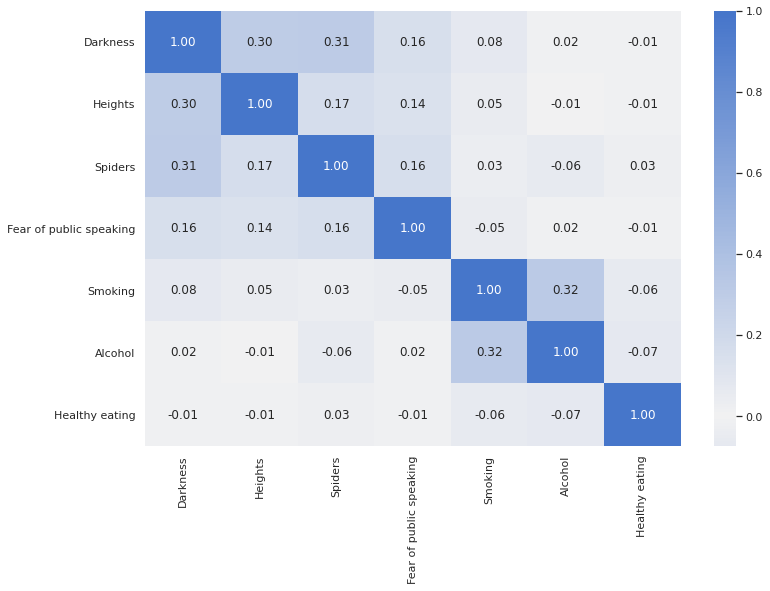

In [28]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr2, annot=True, fmt= '.2f', center = 0.00, cmap = sns.diverging_palette(255, 255, as_cmap=True))

/home/olga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


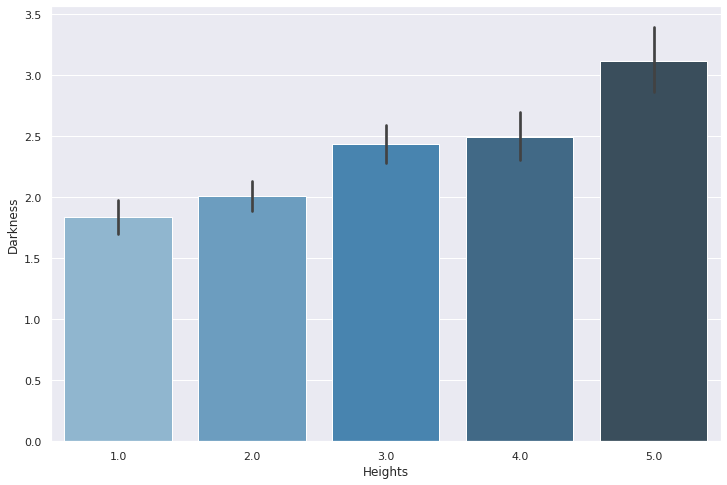

In [29]:
sns.barplot(phobias_alcohol_data['Heights'],phobias_alcohol_data['Darkness'],palette="Blues_d");

/home/olga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


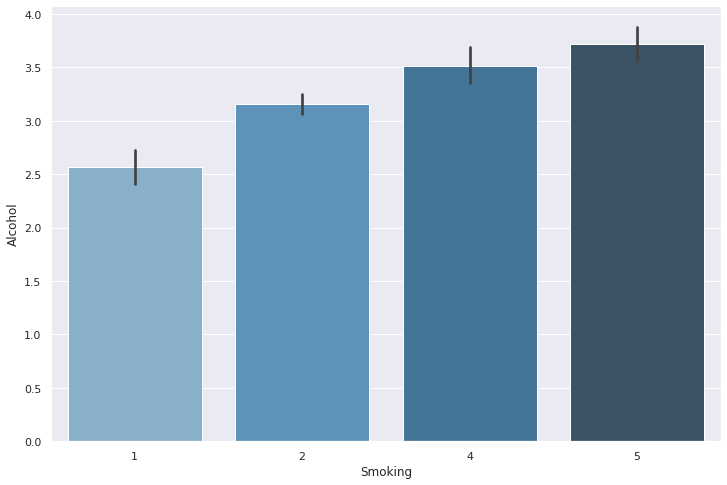

In [30]:
sns.barplot(phobias_alcohol_data['Smoking'],phobias_alcohol_data['Alcohol'],palette="Blues_d");

/home/olga/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


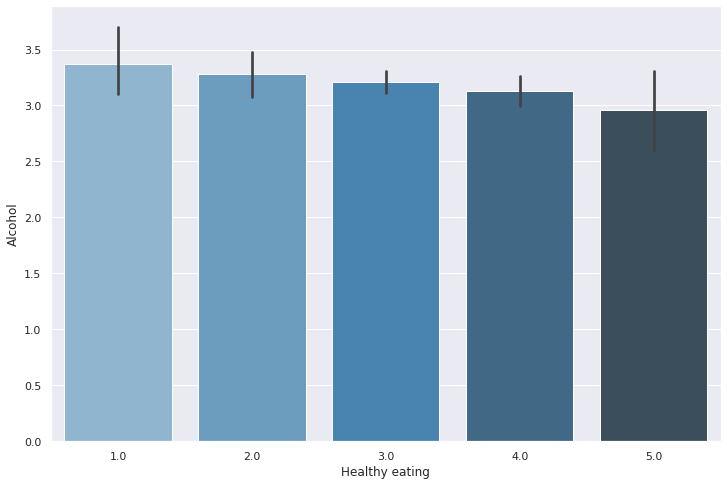

In [31]:
sns.barplot(phobias_alcohol_data['Healthy eating'],phobias_alcohol_data['Alcohol'],palette="Blues_d");